# 2d histograms with marginal densities

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import helper_functions

# read data

In [2]:
# note: 'load_from_pickle' is defined in helper_functions.py
[ERA5_ECMWF, 
 ERA5_IITM, 
 ERA5_ECMWF_deps, 
 ERA5_ECMWF_lows,
 ERA5_IITM_deps, 
 ERA5_IITM_lows] = helper_functions.load_from_pickle('data/update/models_joined_with_era5.pickle')

# Lat/lon bias density histogram

In [3]:
# note: functions used inside this function are defined in helper_functions.py
def make_lat_lon_bias_df(dic, model_name, obs_name):
    
    dic_with_leadtime = helper_functions.add_leadtime_column(dic)
    dic_with_bias = helper_functions.add_position_bias_columns(dic_with_leadtime, model_name, obs_name)
    columns=['ForecastLeadTime', 'LongitudeBias', 'LatitudeBias']
    concatted_df = pd.concat([pd.DataFrame(df, columns=columns) for key,df in dic_with_bias.items()])
    return concatted_df


In [6]:
ERA5_ECMWF_lat_lon_concatted = make_lat_lon_bias_df(ERA5_ECMWF, 'ecmwf', 'era5')
mask = ERA5_ECMWF_lat_lon_concatted['ForecastLeadTime'].le(72)
ERA5_ECMWF_lat_lon_concatted = ERA5_ECMWF_lat_lon_concatted[mask]

In [7]:
ERA5_IITM_lat_lon_concatted = make_lat_lon_bias_df(ERA5_IITM, 'iitm', 'era5')
mask = ERA5_IITM_lat_lon_concatted['ForecastLeadTime'].le(72)
ERA5_IITM_lat_lon_concatted = ERA5_IITM_lat_lon_concatted[mask]

## new helper functions, 07/13/2022

In [8]:
def testfn(ax, lonBias, latBias, xval, yval, errorBarColor, dotsColor, title, ax_label):

    numBins = int(2 * xval)
    
    #replace the seaborn histogram with matplotlib density histogram. Keep seaborn marginal plots.
    #numBins - 1 so that centered on origin
    points = ax.hist2d(lonBias, latBias, bins = [numBins, numBins], range=[[-xval,xval], [-yval,yval]], 
               density = True, cmin = .01, vmax = .15, cmap = plt.cm.OrRd)#YlOrRd)
    plt.colorbar(points[3], ax=ax, orientation='horizontal')
    ax.grid()
    ax.axhline(y=0, color='black')
    ax.axvline(x=0, color='black')
    # ax.plot([-xval, xval], [0, 0], linewidth = 1, color = 'black', zorder = 0)
    # ax.plot([0, 0], [-yval, yval], linewidth = 1, color = 'black', zorder = 0)
    # ax.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    
    # plt.errorbar(meanLonBiasPoint, meanLatBiasPoint, xerr = stdLonBias, fmt = 'o', 
    #              color = errorBarColor, linewidth = 4, zorder = 5)
    # plt.errorbar(meanLonBiasPoint, meanLatBiasPoint, yerr = stdLatBias, fmt = 'o', 
    #              color = errorBarColor, linewidth = 4, zorder = 5)
    
    # plt.annotate('(b)', (0, 1.22), xycoords='axes fraction', size=14)
    
    # plt.scatter(lonBias, latBias, color = dotsColor, s = 4, zorder = 10, alpha = 0.6)
    ax.set_xlabel('longitude bias (deg)', size=12)
    ax.set_ylabel('latitude bias (deg)', size=12)
    ax.set_title(title, size=14)
    
    ax.tick_params(axis='both', labelsize=12)
    
    ax.annotate(ax_label, xy=(0, 1.025), xycoords='axes fraction', fontname='Dejavu Sans', fontsize=12)
    
    # plt.savefig('Figures/figures_07132022/position_bias_density_IITM.pdf', 
    #             format='pdf', bbox_inches='tight')

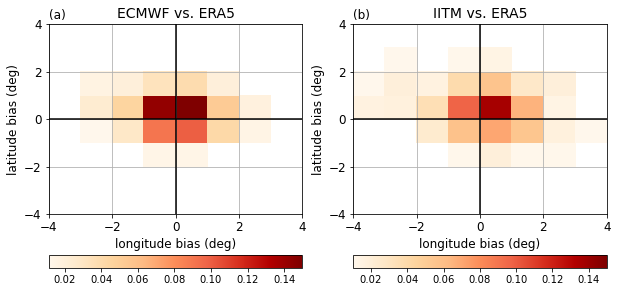

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[10,5])

x_max, y_max = 4, 4

testfn(ax1, ERA5_ECMWF_lat_lon_concatted['LongitudeBias'].values, 
       ERA5_ECMWF_lat_lon_concatted['LatitudeBias'].values,
        x_max, y_max, 'black', 'grey',
       'ECMWF vs. ERA5', '(a)')

testfn(ax2, ERA5_IITM_lat_lon_concatted['LongitudeBias'].values, 
       ERA5_IITM_lat_lon_concatted['LatitudeBias'].values,
       x_max, y_max, 'black', 'grey',
       'IITM vs. ERA5', '(b)')

# plt.savefig('Figures/figures_08212022/position_bias_density.pdf', 
#             format='pdf', bbox_inches='tight')

# Nothing below this is being included in the manuscript. Code below this may therefore not be updated.

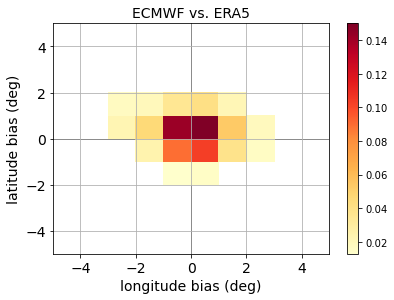

In [20]:
testfn(ERA5_ECMWF_lat_lon_concatted['LongitudeBias'].values, 
                        ERA5_ECMWF_lat_lon_concatted['LatitudeBias'].values,
                        5, 5, 'black', 'grey',
                       'ECMWF vs. ERA5')

## helper functions

In [28]:
#resources for this that I used:
#http://seaborn.pydata.org/generated/seaborn.jointplot.html
#https://stackoverflow.com/questions/53964485/seaborn-jointplot-color-by-density
#https://stackoverflow.com/questions/48154910/seaborn-jointplot-fixing-bin-range-in-marginals

#xval and yval must be offset by .5--so -5 to 5 is not ok but -5.5 to 5.5 is ok!
def biasDensityWithMarginal(lonBias, latBias, xval, yval, errorBarColor, dotsColor, title):
    numBins = int(2 * xval)
    
    #create the seaborn jointplot (sns is seaborn)
    ax1 = sns.jointplot(x=lonBias, y=latBias, xlim=(-xval, xval), ylim=(-yval, yval), 
                        color = 'black', marginal_kws=dict(bins=np.linspace(-xval, xval, numBins + 1)))
    ax1.ax_joint.cla()
    plt.sca(ax1.ax_joint)
    
    #replace the seaborn histogram with matplotlib density histogram. Keep seaborn marginal plots.
    #numBins - 1 so that centered on origin
    plt.hist2d(lonBias, latBias, bins = [numBins, numBins], range=[[-xval,xval], [-yval,yval]], 
               density = True, cmin = .01, vmax = .15, cmap = plt.cm.YlOrRd)
    plt.colorbar()
    plt.grid()
    plt.plot([-xval, xval], [0, 0], linewidth = 1, color = 'black', zorder = 0)
    plt.plot([0, 0], [-yval, yval], linewidth = 1, color = 'black', zorder = 0)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    pos_joint_ax = ax1.ax_joint.get_position()
    pos_marg_x_ax = ax1.ax_marg_x.get_position()
    
    # reposition the joint ax so it has the same width as the marginal x ax
    ax1.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, 
                               pos_joint_ax.height])
    
    # reposition the colorbar using new x positions and y positions of the joint ax
    ax1.fig.axes[-1].set_position([.93, pos_joint_ax.y0, .07, pos_joint_ax.height])
    
    # plot origin and mean bias, write text to display mean bias coordinates and distance of 
    #    mean bias from origin
    meanLonBiasPoint = np.mean(np.array(lonBias))
    stdLonBias = np.std(np.array(lonBias))
    meanLatBiasPoint = np.mean(np.array(latBias))
    stdLatBias = np.std(np.array(latBias))
    #dist = np.mean([math.sqrt(x**2 + y**2) for x,y in zip(lonBias, latBias)]) 
    #not sure how to plot this line above... there's no longer an x or y coord.
    dist = math.sqrt( meanLonBiasPoint**2 + meanLatBiasPoint**2 )
    #plt.plot(0, 0, marker = 'o', color = errorBarColor)
    #plt.plot(meanLonBiasPoint, meanLatBiasPoint, marker = 'o', color = errorBarColor)
    plt.errorbar(meanLonBiasPoint, meanLatBiasPoint, xerr = stdLonBias, fmt = 'o', 
                 color = errorBarColor, linewidth = 4, zorder = 5)
    plt.errorbar(meanLonBiasPoint, meanLatBiasPoint, yerr = stdLatBias, fmt = 'o', 
                 color = errorBarColor, linewidth = 4, zorder = 5)
    plt.annotate('mean = (' + str(np.round(meanLonBiasPoint, 2)) + ', ' + 
                 str(np.round(meanLatBiasPoint, 2)) + ')', (0, 0), (10, 280), 
                 xycoords='axes fraction', textcoords='offset points', va='top')
    plt.annotate('distance = ' + str(np.round(dist, 2)), (0, 0), (10, 270), 
                 xycoords='axes fraction', textcoords='offset points', va='top')
    plt.annotate('lon std = ' + str(np.round(stdLonBias, 2)), (0, 0), (10, 260), 
                 xycoords='axes fraction', textcoords='offset points', va='top')
    plt.annotate('lat std = ' + str(np.round(stdLatBias, 2)), (0, 0), (10, 250), 
                 xycoords='axes fraction', textcoords='offset points', va='top')
    # plt.annotate('(b)', (0, 1.22), xycoords='axes fraction', size=14)
    
    plt.scatter(lonBias, latBias, color = dotsColor, s = 4, zorder = 10, alpha = 0.6)
    plt.xlabel('longitude bias (deg)', size=14)
    plt.ylabel('latitude bias (deg)', size=14)
    plt.title(title, y=1.2, size=14)
    
    plt.tick_params(axis='both', labelsize=14)
    
    # plt.savefig('Figures/figures_07132022/position_bias_density_IITM.pdf', 
    #             format='pdf', bbox_inches='tight')
    plt.show()
    
# code with only seaborn plot (cannot do density histogram, only histogram with values of variable):

# denplot = sns.jointplot(x=lonBias, y=latBias, kind='hist', cbar = True, xlim=(-3, 3), ylim=(-3, 3))
# plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
# pos_joint_ax = denplot.ax_joint.get_position()
# pos_marg_x_ax = denplot.ax_marg_x.get_position()

# # reposition the joint ax so it has the same width as the marginal x ax
# denplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, 
#                                pos_joint_ax.height])

# # reposition the colorbar using new x positions and y positions of the joint ax
# denplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])
# plt.show()

## plots

### models vs. ERA5

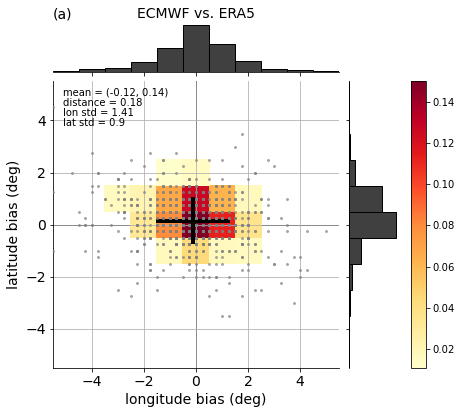

In [24]:
biasDensityWithMarginal(ERA5_ECMWF_lat_lon_concatted['LongitudeBias'].values, 
                        ERA5_ECMWF_lat_lon_concatted['LatitudeBias'].values,
                        5.5, 5.5, 'black', 'grey',
                       'ECMWF vs. ERA5')

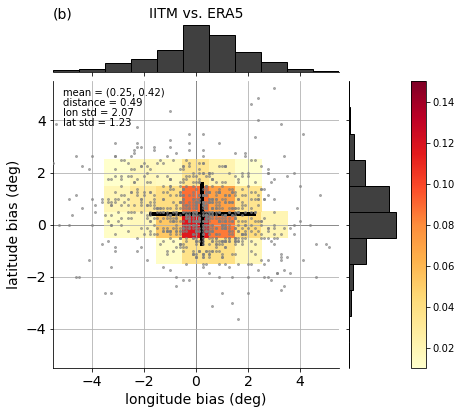

In [27]:
biasDensityWithMarginal(ERA5_IITM_lat_lon_concatted['LongitudeBias'].values, 
                        ERA5_IITM_lat_lon_concatted['LatitudeBias'].values,
                        5.5, 5.5, 'black', 'grey',
                       'IITM vs. ERA5')

### models vs. MERRA2

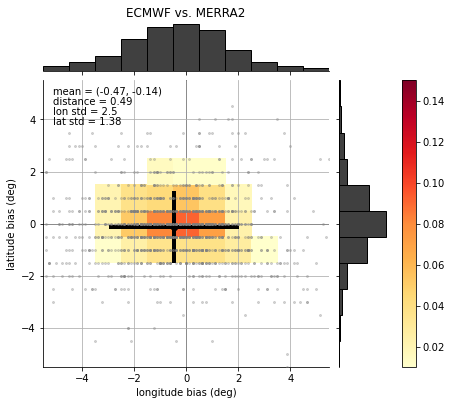

In [28]:
MERRA2_ECMWF_lat_lon_concatted = make_lat_lon_bias_df(MERRA2_ECMWF, 'ecmwf', 'merra2')
biasDensityWithMarginal(MERRA2_ECMWF_lat_lon_concatted['LongitudeBias'].values, 
                        MERRA2_ECMWF_lat_lon_concatted['LatitudeBias'].values,
                        5.5, 5.5, 'black', 'grey',
                       'ECMWF vs. MERRA2')

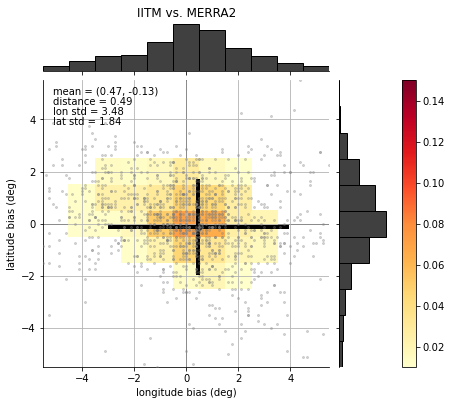

In [31]:
MERRA2_IITM_lat_lon_concatted = make_lat_lon_bias_df(MERRA2_IITM, 'iitm', 'merra2')
biasDensityWithMarginal(MERRA2_IITM_lat_lon_concatted['LongitudeBias'].values, 
                        MERRA2_IITM_lat_lon_concatted['LatitudeBias'].values,
                        5.5, 5.5, 'black', 'grey',
                       'IITM vs. MERRA2')

# 1:1 plot with wind speed

## helper methods

In [22]:
#resources for this that I used:
#http://seaborn.pydata.org/generated/seaborn.jointplot.html
#https://stackoverflow.com/questions/53964485/seaborn-jointplot-color-by-density
#https://stackoverflow.com/questions/48154910/seaborn-jointplot-fixing-bin-range-in-marginals

#xval and yval need to be offset by .5--i.e. they cannot be -5 to 5 but can be -5.5 to 5.5
#x1 is the leftmost value on the x axis, x2 is the rightmost value on the x axis. Same for y1 and y2.
def densityWithMarginal(xvalues, yvalues, xtitle, ytitle, x1, x2, y1, y2, mindensity, maxdensity, 
                        numBins, errorBarColor, meanColor, removeOutliers, title, outlierValue=12):
    #numBins = int(x2 - x1)
    #create the seaborn jointplot (sns is seaborn)
    ax1 = sns.jointplot(x=xvalues, y=yvalues, xlim=(x1, x2), ylim=(y1, y2), color = 'black', 
                        marginal_kws=dict(bins=np.linspace(x1, x2, numBins + 1)))
    # ax1 = sns.jointplot(x=lonBias, y=latBias, xlim=(-5.5, 5.5), ylim=(-5.5, 5.5), color = 'black', 
    #                     marginal_kws=dict(bins=np.linspace(-5.5, 5.5, 12)))
    ax1.ax_joint.cla()
    plt.sca(ax1.ax_joint)
    
    #replace the seaborn histogram with matplotlib density histogram. Keep seaborn marginal plots.
    plt.hist2d(xvalues, yvalues, bins = [numBins, numBins], range=[[x1, x2], [y1, y2]], 
               density = True, cmin=mindensity, vmax=maxdensity, cmap = plt.cm.YlOrRd)
    plt.colorbar()
    plt.grid()
    plt.plot([x1, x2], [0, 0], linewidth = 2, color = 'black')
    plt.plot([0, 0], [y1, y2], linewidth = 2, color = 'black')
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    pos_joint_ax = ax1.ax_joint.get_position()
    pos_marg_x_ax = ax1.ax_marg_x.get_position()
    
    # reposition the joint ax so it has the same width as the marginal x ax
    ax1.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, 
                               pos_joint_ax.height])
    
    # reposition the colorbar using new x positions and y positions of the joint ax
    ax1.fig.axes[-1].set_position([.93, pos_joint_ax.y0, .07, pos_joint_ax.height])
    
    #plot origin and mean bias, write text to display mean bias coordinates and distance of 
    #    mean bias from origin
    meanXPoint = np.mean(np.array(xvalues))
    stdX = np.std(np.array(xvalues))
    meanYPoint = np.mean(np.array(yvalues))
    stdY = np.std(np.array(yvalues))
    dist = math.sqrt( meanXPoint**2 + meanYPoint**2 )
    #plt.plot(0, 0, marker = 'o', color = 'black')
    plt.errorbar(meanXPoint, meanYPoint, xerr = stdX, fmt = 'o', color = errorBarColor, 
                 linewidth = 4, zorder = 5)
    plt.errorbar(meanXPoint, meanYPoint, yerr = stdY, fmt = 'o', color = errorBarColor, 
                 linewidth = 4, zorder = 5)
    plt.plot(meanXPoint, meanYPoint, marker = 'o', color = meanColor, zorder = 50)
    plt.plot([0,30],[0,30], linewidth=1, color='black') #y=x line
    plt.annotate('mean = (' + str(np.round(meanXPoint, 2)) + ', ' + str(np.round(meanYPoint, 2)) + ')', 
                 (0, 0), (10, 280), xycoords='axes fraction', textcoords='offset points', va='top')
    plt.annotate('distance = ' + str(np.round(dist, 2)), (0, 0), (10, 270), xycoords='axes fraction', 
                 textcoords='offset points', va='top')
    plt.annotate('x std = ' + str(np.round(stdX, 2)), (0, 0), (10, 260), xycoords='axes fraction', 
                 textcoords='offset points', va='top')
    plt.annotate('y std = ' + str(np.round(stdY, 2)), (0, 0), (10, 250), xycoords='axes fraction', 
                 textcoords='offset points', va='top')
    
    newX, newY = xvalues, yvalues
    if removeOutliers == True:
        newX, newY = [], []
        index = 0
        for item in xvalues:
            if item < outlierValue:
                newX.append(item)
                newY.append(yvalues[index])
            index += 1

    
    model = np.polyfit(newX, newY, 1)
    predict = np.poly1d(model)
    x_lin_reg = np.unique(newX)
    plt.plot(x_lin_reg, predict(x_lin_reg), color='green')
    plt.annotate('y = ' + str(np.round(model[0], 2)) + 'x + ' + str(np.round(model[1], 2)), (0, 0), 
                 (140, 280), xycoords='axes fraction', textcoords='offset points', va='top')

    model2 = np.polyfit(newX, newY, 2)
    predict2 = np.poly1d(model2)
    x_lin_reg2 = np.unique(newX)
    plt.plot(x_lin_reg2, predict2(x_lin_reg2), color='blue')
    
    plt.annotate('y = ' + str(np.round(model2[0], 2)) + 'x^2 + ' + str(np.round(model2[1], 2)) + 'x + '
                 + str(np.round(model2[2], 2)), (0, 0), (140, 270), xycoords='axes fraction', 
                 textcoords='offset points', va='top')
    
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.title(title, y=1.2)
    
    #plt.savefig("Figures/windspeed_density_IITM.pdf", format='pdf', bbox_inches='tight') #CHANGE
    
    plt.show()

In [16]:
def make_windspeed_df(dic, model_name, obs_name):
    
    columns=['MaxSfcWind_'+obs_name, 'MaxSfcWind_'+model_name]
    
    concatted_df_windspeed = pd.concat([pd.DataFrame(df, columns=columns) 
                                       for key,df in dic.items()])
    
    return concatted_df_windspeed

In [17]:
def get_windspeed_values(windspeed_df, model_name, obs_name):
    return windspeed_df['MaxSfcWind_'+obs_name].values, windspeed_df['MaxSfcWind_'+model_name].values

## plots

### models vs. ERA5

In [18]:
ERA5_ECMWF_ws = make_windspeed_df(ERA5_ECMWF, 'ecmwf', 'era5')
ERA5_ECMWF_obs_ws, ERA5_ECMWF_model_ws = get_windspeed_values(ERA5_ECMWF_ws, 'ecmwf', 'era5')

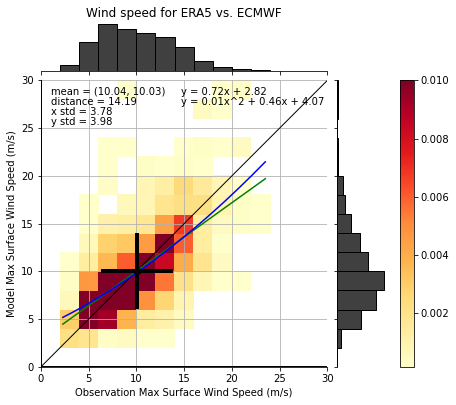

In [19]:
densityWithMarginal(ERA5_ECMWF_obs_ws, ERA5_ECMWF_model_ws, 
                    'Observation Max Surface Wind Speed (m/s)', 
                    'Model Max Surface Wind Speed (m/s)', 
                    0, 30, 0, 30, .0001, .01, 15, 'black', 'black', False, 
                    'Wind speed for ERA5 vs. ECMWF')

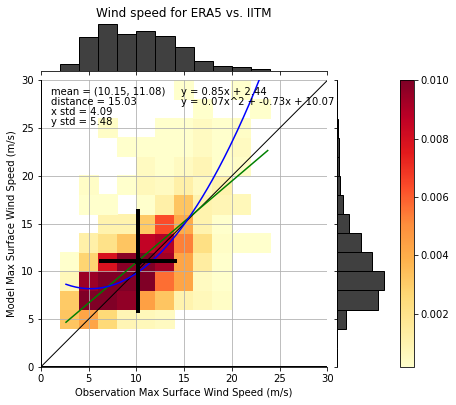

In [21]:
ERA5_IITM_ws = make_windspeed_df(ERA5_IITM, 'iitm', 'era5')
obs_ws, model_ws = get_windspeed_values(ERA5_IITM_ws, 'iitm', 'era5')

densityWithMarginal(obs_ws, model_ws, 
                    'Observation Max Surface Wind Speed (m/s)', 
                    'Model Max Surface Wind Speed (m/s)', 
                    0, 30, 0, 30, .0001, .01, 15, 'black', 'black', False, 
                    'Wind speed for ERA5 vs. IITM')

### models vs. MERRA2

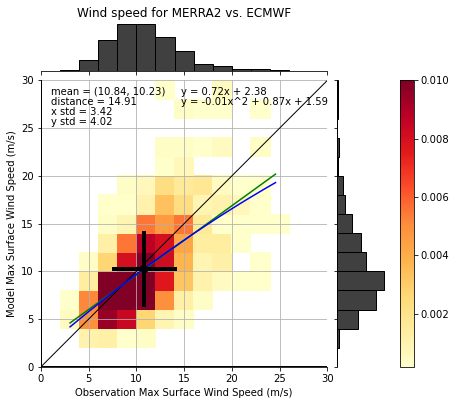

In [61]:
MERRA2_ECMWF_ws = make_windspeed_df(MERRA2_ECMWF, 'ecmwf', 'merra2')
obs_ws, model_ws = get_windspeed_values(MERRA2_ECMWF_ws, 'ecmwf', 'merra2')

densityWithMarginal(obs_ws, model_ws, 
                    'Observation Max Surface Wind Speed (m/s)', 
                    'Model Max Surface Wind Speed (m/s)', 
                    0, 30, 0, 30, .0001, .01, 15, 'black', 'black', False, 
                    'Wind speed for MERRA2 vs. ECMWF')

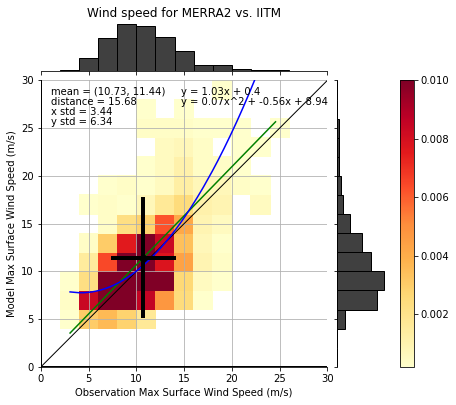

In [60]:
MERRA2_IITM_ws = make_windspeed_df(MERRA2_IITM, 'iitm', 'merra2')
obs_ws, model_ws = get_windspeed_values(MERRA2_IITM_ws, 'iitm', 'merra2')

densityWithMarginal(obs_ws, model_ws, 
                    'Observation Max Surface Wind Speed (m/s)', 
                    'Model Max Surface Wind Speed (m/s)', 
                    0, 30, 0, 30, .0001, .01, 15, 'black', 'black', False, 
                    'Wind speed for MERRA2 vs. IITM')